In [1]:
import sys
import os

file_path = globals()['_dh'][0]
sys.path.append(os.path.abspath(os.path.join(file_path, "../..")))

import numpy as np
from model_equations import Model
from miniature_octo_chainsaw.logging_ import logger
from miniature_octo_chainsaw.preprocessing.preprocess_data import DataPreprocessor
from miniature_octo_chainsaw.parameter_estimation.initial_guess import InitialGuessGenerator
from miniature_octo_chainsaw.parameter_estimation.parameter_estimator import ParameterEstimator
from miniature_octo_chainsaw.parameter_estimation.results import save_results_as_pickle

logger.setLevel("INFO")

[10-09 10:10:20] {yaml_parser:128} INFO - Model specifications not loaded yet. Parsing now.
[10-09 10:10:20] {yaml_parser:38} INFO - Parsing model specifications.
[10-09 10:10:20] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\steinmetz_larter/model_specifications.yaml
[10-09 10:10:20] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:10:20] {yaml_parser:132} INFO - Meta parameters not loaded yet. Parsing now.
[10-09 10:10:20] {yaml_parser:49} INFO - Parsing meta parameters.
[10-09 10:10:20] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\steinmetz_larter/meta_parameters.yaml
[10-09 10:10:20] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:10:20] {base_model:69} INFO - True model parameters: {'k1': 0.1631021, 'k2': 1250, 'k3': 0.046875, 'k4': 20, 'k5': 1.104, 'k6': 0.001, 'k7': 4.24, 'km7': 0.1175, 'k8

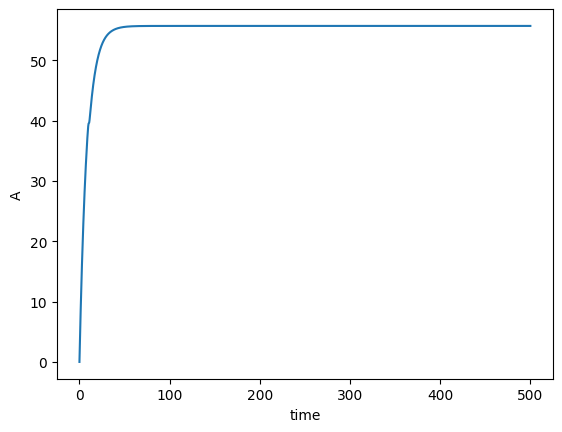

[10-09 10:10:24] {initial_guess:27} INFO - Step 2: Continue the steady state to draw a bifurcation diagram.


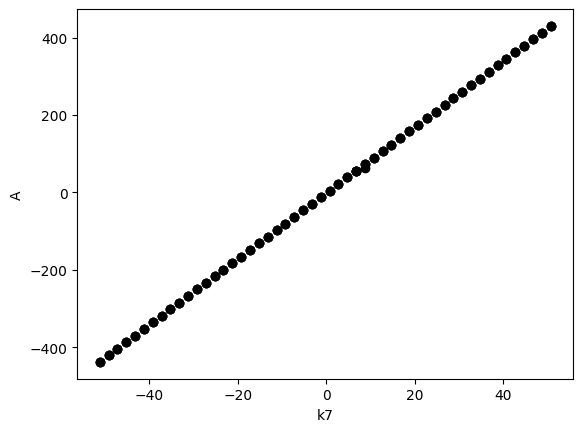

[10-09 10:11:11] {deflated_continuation:505} INFO - Bifurcations were detected near the following values of k7:
[10-09 10:11:11] {deflated_continuation:507} INFO - 1: 0.7887181616752716
[10-09 10:11:11] {deflated_continuation:507} INFO - 2: 2.7887181616752716
[10-09 10:11:11] {deflated_continuation:507} INFO - 3: 6.788718161675272
[10-09 10:11:11] {deflated_continuation:507} INFO - 4: 8.788718161675272
[10-09 10:11:32] {bifurcation_point:113} WARNING - Objective function is satisfied only upto 4.762e-03
[10-09 10:11:32] {bifurcation_point:115} INFO - Found a bifurcation point at 0.7878491874096911.
[10-09 10:11:32] {initial_guess:32} INFO - Step 3: Trace a two-parameter bifurcation diagram along the data.


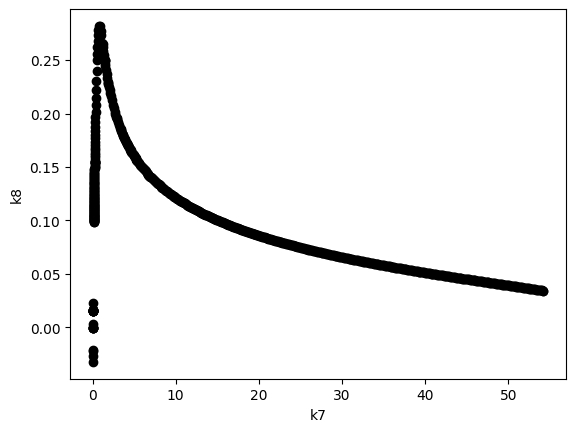

[10-09 10:12:16] {initial_guess:37} INFO - Step 5: Match the predicted points to experimental data.
[10-09 10:12:16] {initial_guess:43} INFO - Step 6: Append global parameters to the initial guess.


In [2]:
# Load the model and randomize the parameters
model = Model()
model.generate_parameter_guesses()

# Preprocess the data
data_preprocessor = DataPreprocessor()
data_preprocessor.load_the_data(file_path=os.path.join(file_path))
data_preprocessor.add_noise_to_the_data(scale=model.data_noise)
data_preprocessor.select_subset_of_data(length=25)
model.data = data_preprocessor.data

# Generate initial guesses for the parameter estimation
initializer = InitialGuessGenerator(model=model)

[10-09 10:12:16] {parameter_estimator:82} INFO - Estimate the model parameters using osqp solver.
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:118: UserWarning: Converting sparse P to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse P to a CSC " +
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 302, constraints m = 280
          nnz(P) + nnz(A) = 2560
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.6749e+00   2.87e-02   8.14e-01   1.00e-01   4.72e-04s
  50  -3.8652e+00   1.52e-07   3.57e-11   5.93e+01   1.27e-03s

status:               solved
number of iter

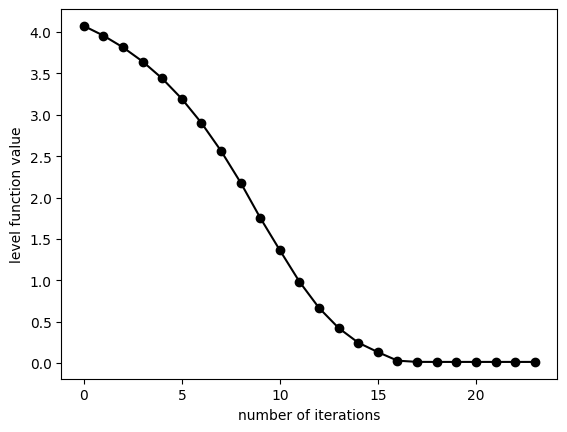

[10-09 10:12:50] {parameter_estimator:86} INFO - Solver has converged in 24 iterations!
[10-09 10:12:50] {parameter_estimator:87} INFO - Initial guesses: {'k1': np.float64(0.28248596672921555), 'k5': np.float64(0.1790561469188685)}.
[10-09 10:12:50] {parameter_estimator:88} INFO - Solutions: {'k1': np.float64(0.15684136188233844), 'k5': np.float64(1.0761775285327835)}.
[10-09 10:12:50] {parameter_estimator:91} INFO - Confidence intervals: {'k1': np.float64(0.08986658497488853), 'k5': np.float64(0.42079119020296385)}.


Function __run_solver took 34.123 seconds.


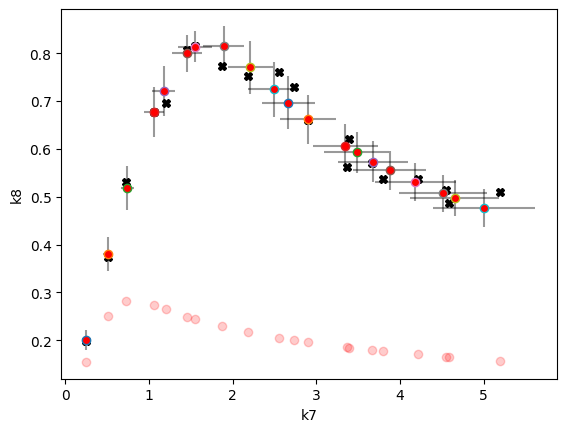

In [3]:
# Solve parameter estimation problem
fit_osqp = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="osqp",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

[10-09 10:12:50] {parameter_estimator:82} INFO - Estimate the model parameters using gauss-newton solver.


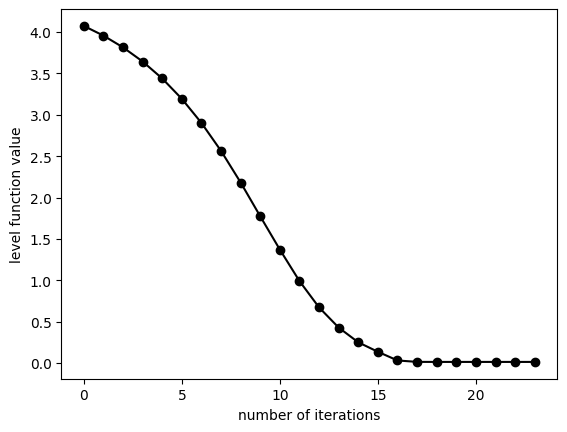

[10-09 10:13:30] {parameter_estimator:86} INFO - Solver has converged in 24 iterations!
[10-09 10:13:30] {parameter_estimator:87} INFO - Initial guesses: {'k1': np.float64(0.28248596672921555), 'k5': np.float64(0.1790561469188685)}.
[10-09 10:13:30] {parameter_estimator:88} INFO - Solutions: {'k1': np.float64(0.15684912117190947), 'k5': np.float64(1.0762071904372925)}.
[10-09 10:13:30] {parameter_estimator:91} INFO - Confidence intervals: {'k1': np.float64(0.08987916573818915), 'k5': np.float64(0.42088237359534597)}.


Function __run_solver took 39.667 seconds.


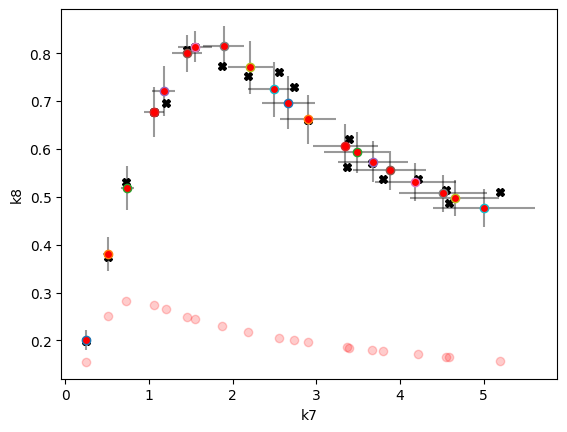

In [4]:
fit_gn = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="gauss-newton",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

In [5]:
np.diag(fit_osqp.result.covariance_matrix)[:20]

array([2.11468478e+00, 4.99286235e+05, 5.69921250e-05, 7.01609499e-03,
       4.13985203e-02, 2.43619895e-02, 1.41396822e-03, 1.77727536e-03,
       1.30716778e-05, 1.36357328e-01, 2.08386370e-03, 2.99091533e-03,
       1.35721559e-04, 5.79890858e-03, 1.61867618e-01, 5.53153326e+00,
       7.57696761e+03, 9.26364583e-05, 1.06638583e-01, 1.67524340e-01])

In [6]:
np.diag(fit_gn.result.covariance_matrix)[:20]

array([2.11464460e+00, 4.99157462e+05, 5.69887278e-05, 7.01632406e-03,
       4.13984763e-02, 2.43617737e-02, 1.41391826e-03, 1.77717827e-03,
       1.30715427e-05, 1.36347212e-01, 2.08362872e-03, 2.99095969e-03,
       1.35717990e-04, 5.80066104e-03, 1.61865853e-01, 5.53165101e+00,
       7.57605495e+03, 9.26333792e-05, 1.06634104e-01, 1.67525367e-01])

In [7]:
fit_gn.result.x[:10]

array([ 4.08661266e-01,  1.59947592e+02,  8.01720443e-03,  3.88122223e-02,
        2.49131780e-01,  2.01114081e-01, -6.90592244e-01, -6.95040708e-01,
        3.66292210e-03,  1.15729927e-01])

In [8]:
fit_osqp.result.x[:10]

array([ 4.08644824e-01,  1.59955908e+02,  8.01727182e-03,  3.88128087e-02,
        2.49130679e-01,  2.01114912e-01, -6.90591879e-01, -6.95040247e-01,
        3.66295894e-03,  1.15733857e-01])